In [1]:
#https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e
#https://pypi.org/project/scikit-survival/
#https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html
#https://square.github.io/pysurvival/miscellaneous/save_load.html

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

df = pd.read_csv('ipec.csv', sep=';').fillna('-1')
df.head()


,id,ini,fim,tempo,status,sexo,escola,idade,risco,acompan,obito,anotrat,tratam,doenca,propcp
0,1,1243,2095,852,1,M,3,34,0,1,S,1991,1,4,3
1,2,2800,2923,123,1,M,2,38,6,1,S,9,0,7,4
2,3,1250,2395,1145,1,M,-1,32,0,1,S,1992,1,3,4
3,4,1915,4670,2755,0,M,-1,43,6,0,N,1992,1,10,4
4,5,2653,4770,2117,0,M,-1,40,0,1,N,1992,1,5,4


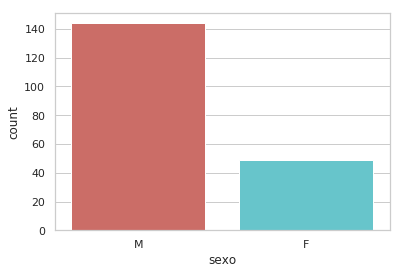

In [2]:
sns.countplot(x='sexo', data=df, palette='hls')

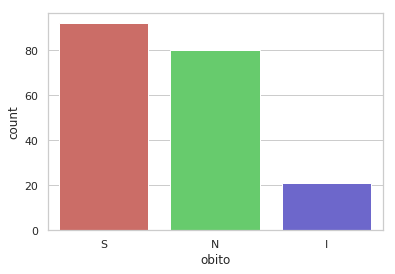

In [63]:
sns.countplot(x='obito', data=df, palette='hls')

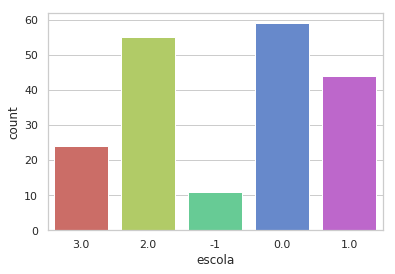

In [64]:
sns.countplot(x='escola', data=df, palette='hls')

Text(0, 0.5, 'Frequency of Risk')

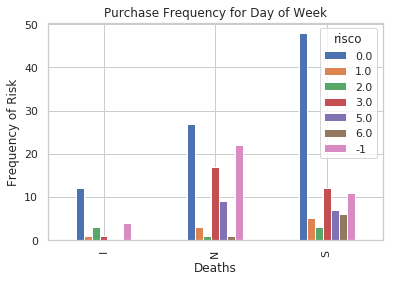

In [65]:
pd.crosstab(df.obito,df.risco).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Deaths')
plt.ylabel('Frequency of Risk')

Text(0, 0.5, 'Risk Frequency')

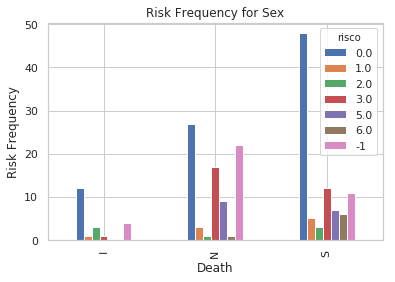

In [66]:
%matplotlib inline
pd.crosstab(df.obito,df.risco).plot(kind='bar')
plt.title('Risk Frequency for Sex')
plt.xlabel('Death')
plt.ylabel('Risk Frequency')

Text(0, 0.5, 'Risk')

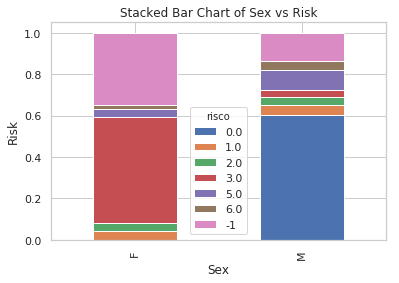

In [67]:
table=pd.crosstab(df.sexo,df.risco)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Sex vs Risk')
plt.xlabel('Sex')
plt.ylabel('Risk')

Text(0, 0.5, 'Frequency')

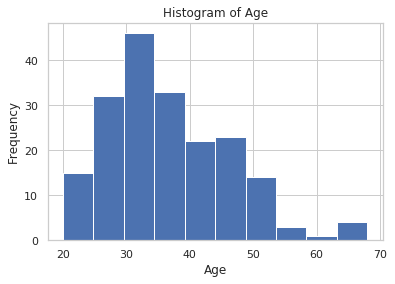

In [68]:
df.idade.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

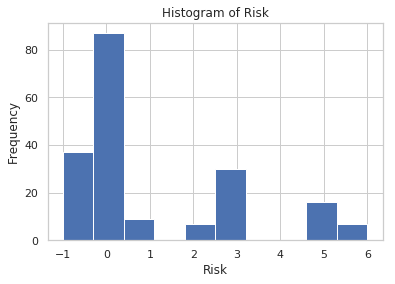

In [89]:
df.risco.astype(int).hist()
plt.title('Histogram of Risk')
plt.xlabel('Risk')
plt.ylabel('Frequency')


In [45]:
dfSample.reset_index()

,index,id,ini,fim,tempo,status,sexo,escola,idade,risco,acompan,obito,anotrat,tratam,doenca,propcp
0,5,6,3,332,329,0,M,-1,34,0,1,I,9,0,7,0
1,6,7,36,96,60,1,M,-1,27,0,2,S,9,0,7,0
2,7,8,1,152,151,1,M,0,22,6,2,S,9,0,3,0


Observed lifetimes at time 0:
 0     3
1    36
2     1
Name: ini, dtype: int64


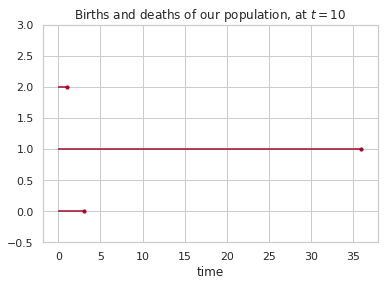

In [51]:
dfSample = df[5:8]
dfSample = dfSample.reset_index()

#https://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html
from lifelines.plotting import plot_lifetimes
import numpy as np
from numpy.random import uniform, exponential

N = dfSample.shape[0]

CURRENT_TIME = 0

actual_lifetimes = dfSample.tempo #np.array([exponential(12) if (uniform() < 0.5) else exponential(2) for i in range(N)]) 
observed_lifetimes = dfSample.ini
death_observed = dfSample.fim

ax = plot_lifetimes(observed_lifetimes, event_observed=death_observed)

#ax.set_xlim(0, N)
#ax.vlines(10, 0, 30, lw=2, linestyles='--')
ax.set_xlabel("time")
ax.set_title("Births and deaths of our population, at $t=10$")
print("Observed lifetimes at time %d:\n" % (CURRENT_TIME), observed_lifetimes)


In [ ]:
# Python code to create the above Kaplan Meier curvefrom lifelines import KaplanMeierFitter
from lifelines import KaplanMeierFitter

## Example Data 
durations = df.tempo
event_observed = df.status

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed, label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=True) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.